# **Random Forest Algorithm**

Random Forest is a popular supervised learning algorithm that can be used for both classification and regression tasks. To fully understand Random Forest, it's important to first understand what a Decision Tree is. Decision Trees are a type of machine learning algorithm that represent the complex hierarchical relationship between the target and feature variables. They take the form of a tree-like structure, consisting of a root node, decision node, and leaf nodes.

A Decision Tree splits the dataset into subsets recursively to capture the underlying features and patterns in the data. Each level node in the decision tree corresponds to different relevant features.

Decision Trees are efficient at finding the combination of features that lead to a specific decision being made. For example, if there is rain and wind, you should not go outside to play; if it's sunny and cloudy, then you can go outside to play. Decision Trees are essentially a collection of if-else statements, but we don't know what conditions are used to split the data until the tree is completely built. Once the tree is built, we can interpret it.

Random Forest is simply an ensemble learning algorithm which a collection of individual Decision Trees, where each tree predicts the output for each sample from the entire data. Finally, we combine the predictions made by each of the individual Decision Trees to get the overall prediction of the Random Forest. This method is called Bagging.

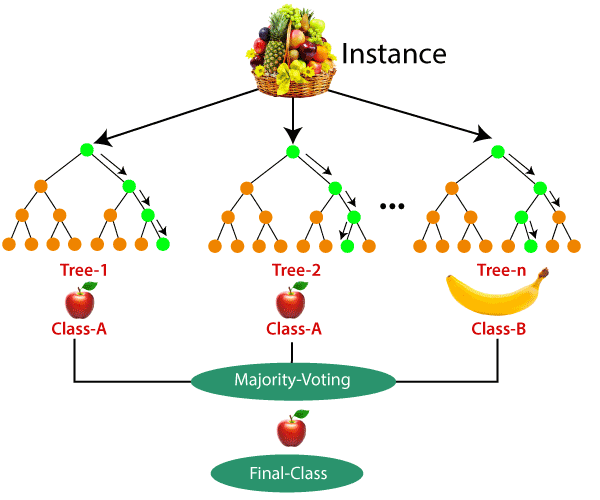

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## **Checking for NaN values**

In [5]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
df.columns = ['Age', 'Gender', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar',
              'RestingECG', 'MaxHeartRate', 'ExerciseAngina', 'STDepression', 'Slope', 'NumVessels', 'Thalassemia', 'Target']

def map_disease_status(target):
    return 'Has Disease' if target == 1 else 'No Disease'

df['Target_raw'] = df['Target'].apply(map_disease_status)

In [7]:
df

,Age,Gender,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseAngina,STDepression,Slope,NumVessels,Thalassemia,Target,Target_raw
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,No Disease
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,No Disease
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,No Disease
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,No Disease
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,No Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Has Disease
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,No Disease
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,No Disease
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Has Disease


## **Checking Outliers**

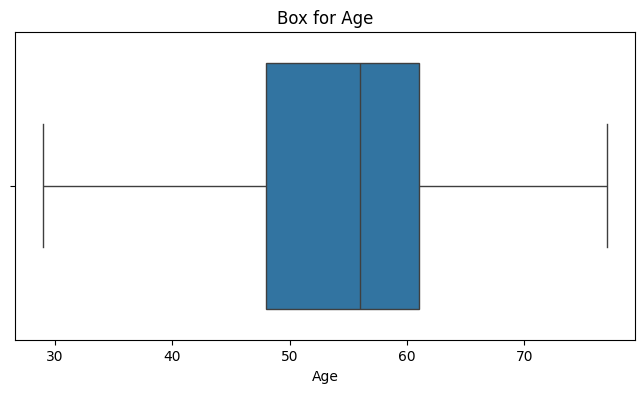

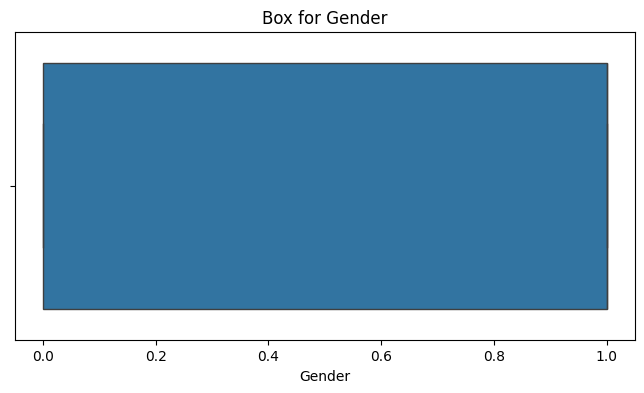

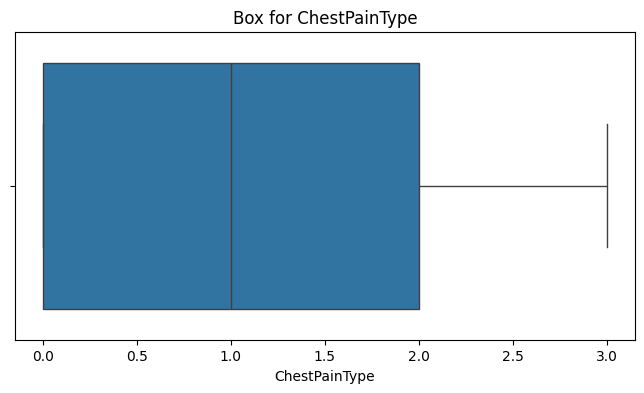

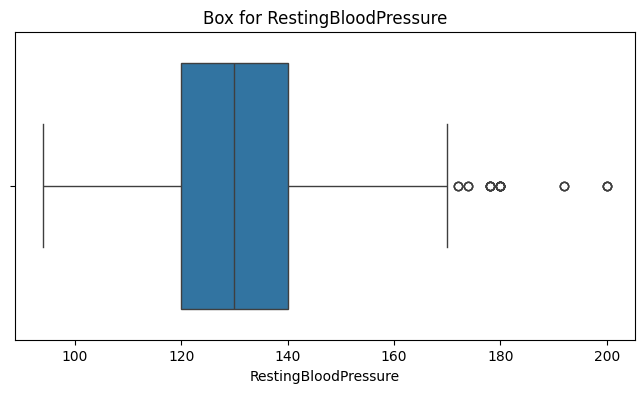

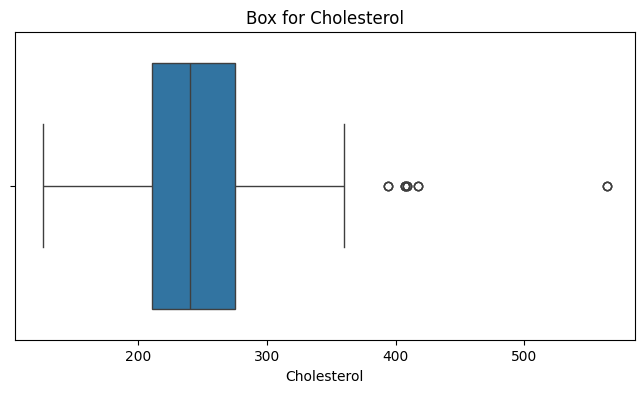

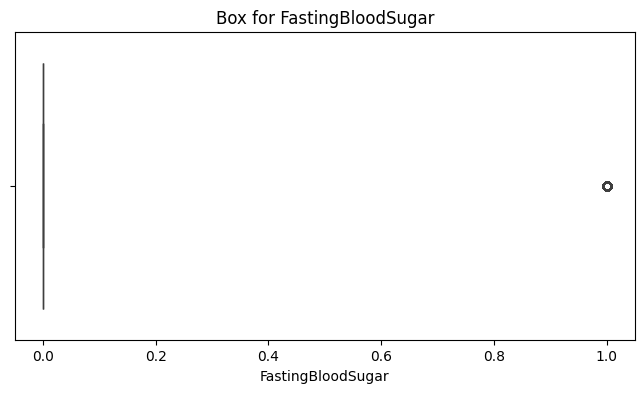

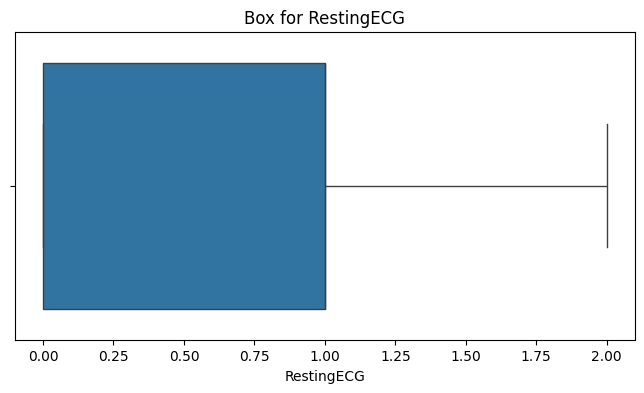

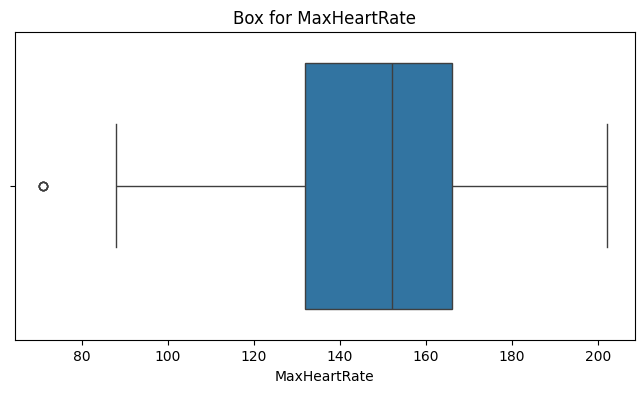

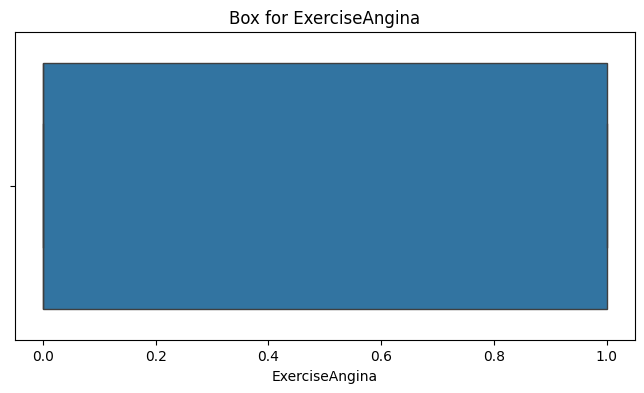

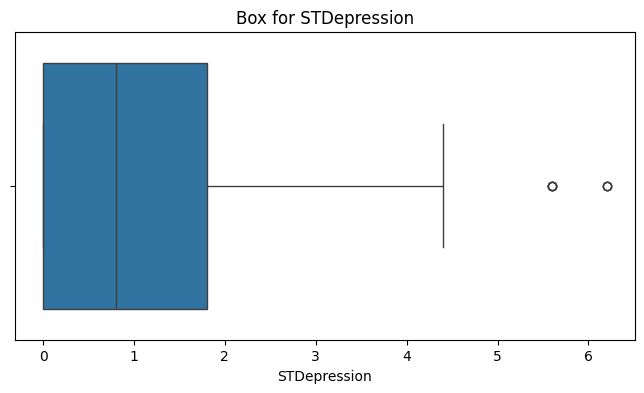

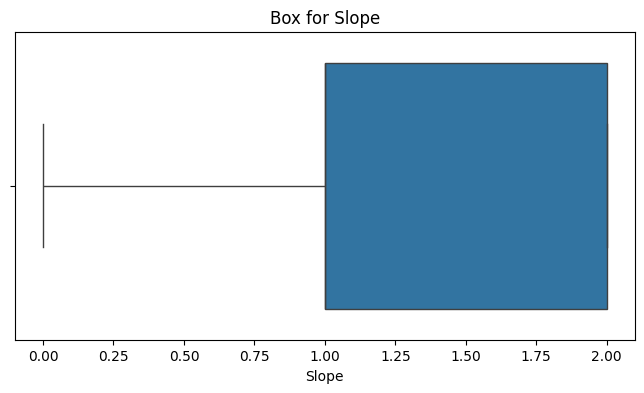

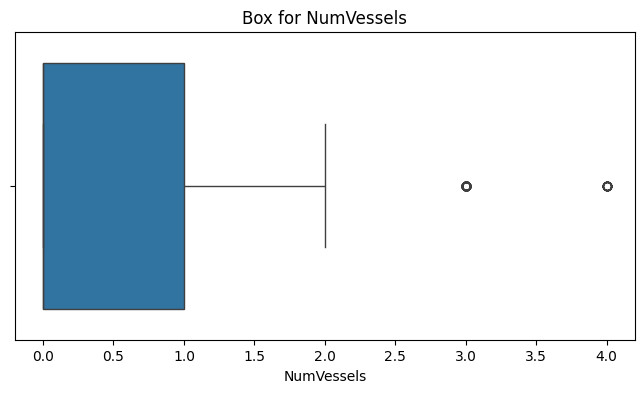

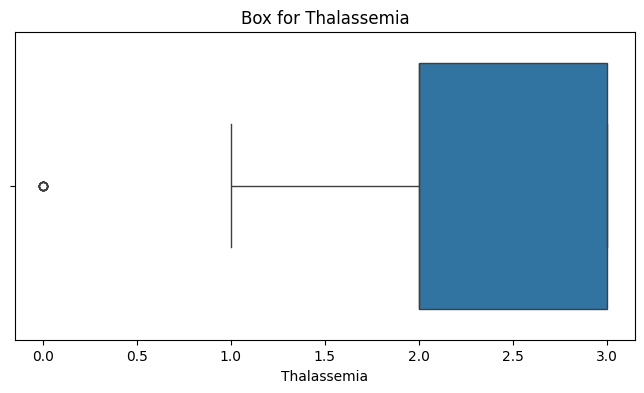

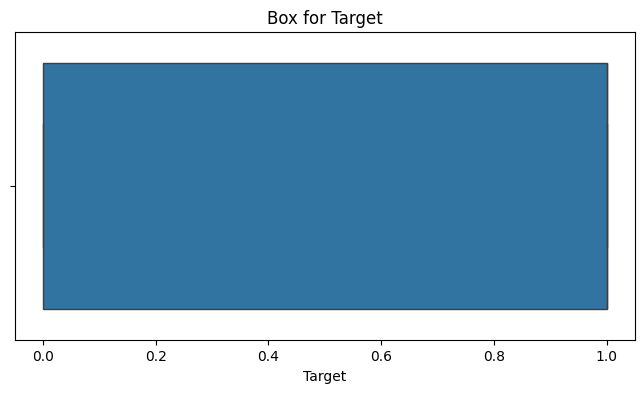

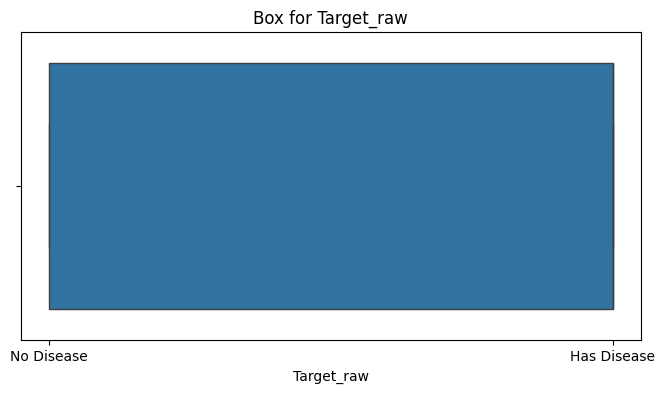

In [8]:
def check_outliers(df, column_name):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x = df[column_name])
    plt.title(f"Box for {column_name}")
    plt.show()

for col in df.columns:
    check_outliers(df, col)

## **Univariate Analysis**

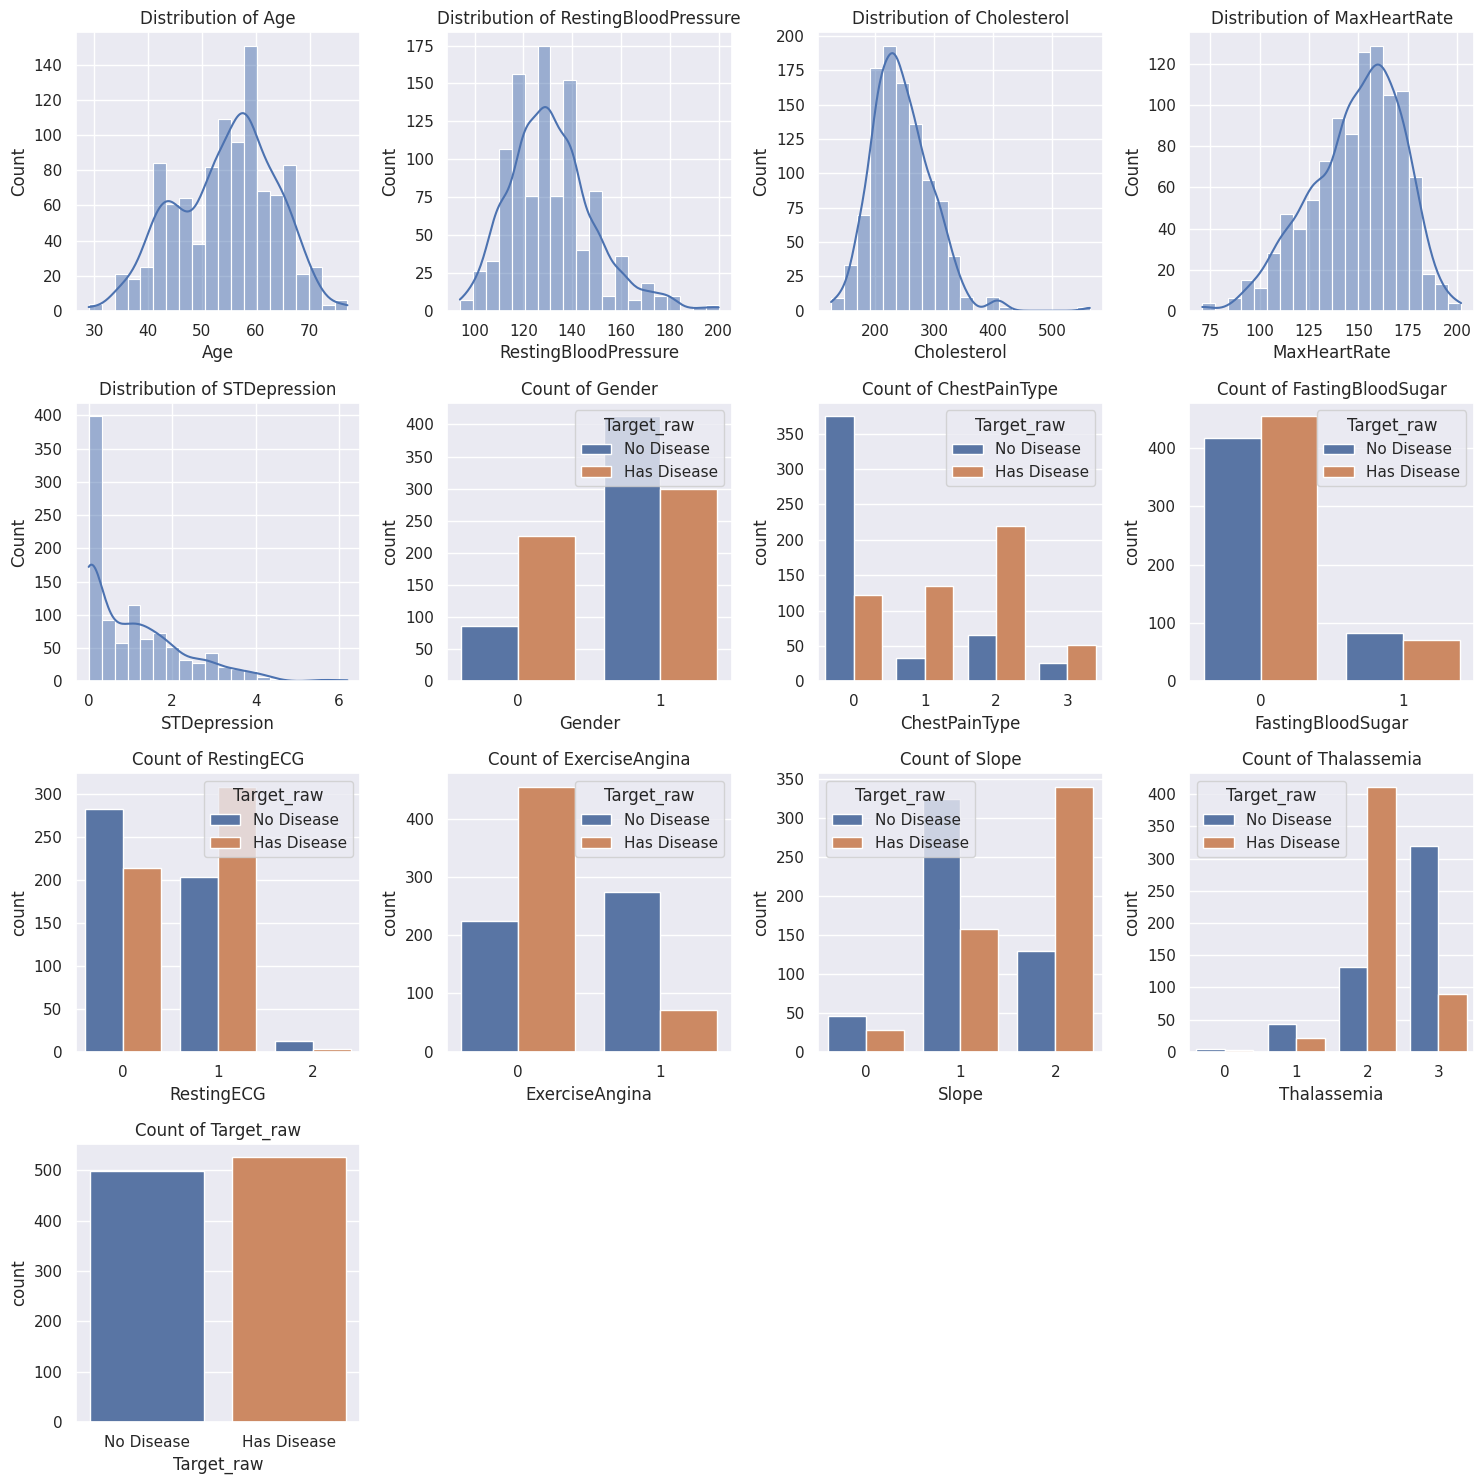

In [9]:
sns.set_theme()

plt.figure(figsize=(15, 15))

numerical_features = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'STDepression']
cat_features = ['Gender', 'ChestPainType', 'FastingBloodSugar', 'RestingECG', 'ExerciseAngina', 'Slope', 'Thalassemia', 'Target_raw']


num_numerical = len(numerical_features)
num_categorical = len(cat_features)
num_rows = 4  # Adjust as needed
num_cols = (num_numerical + num_categorical - 1) // num_rows + 1

# Plot numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')

# Plot categorical features
for i, feature in enumerate(cat_features, 1):
    plt.subplot(num_rows, num_cols, i + num_numerical)
    sns.countplot(data=df, x=feature, hue='Target_raw')
    plt.title(f"Count of {feature}")

plt.tight_layout()
plt.show()

## **Bivariate Analysis**


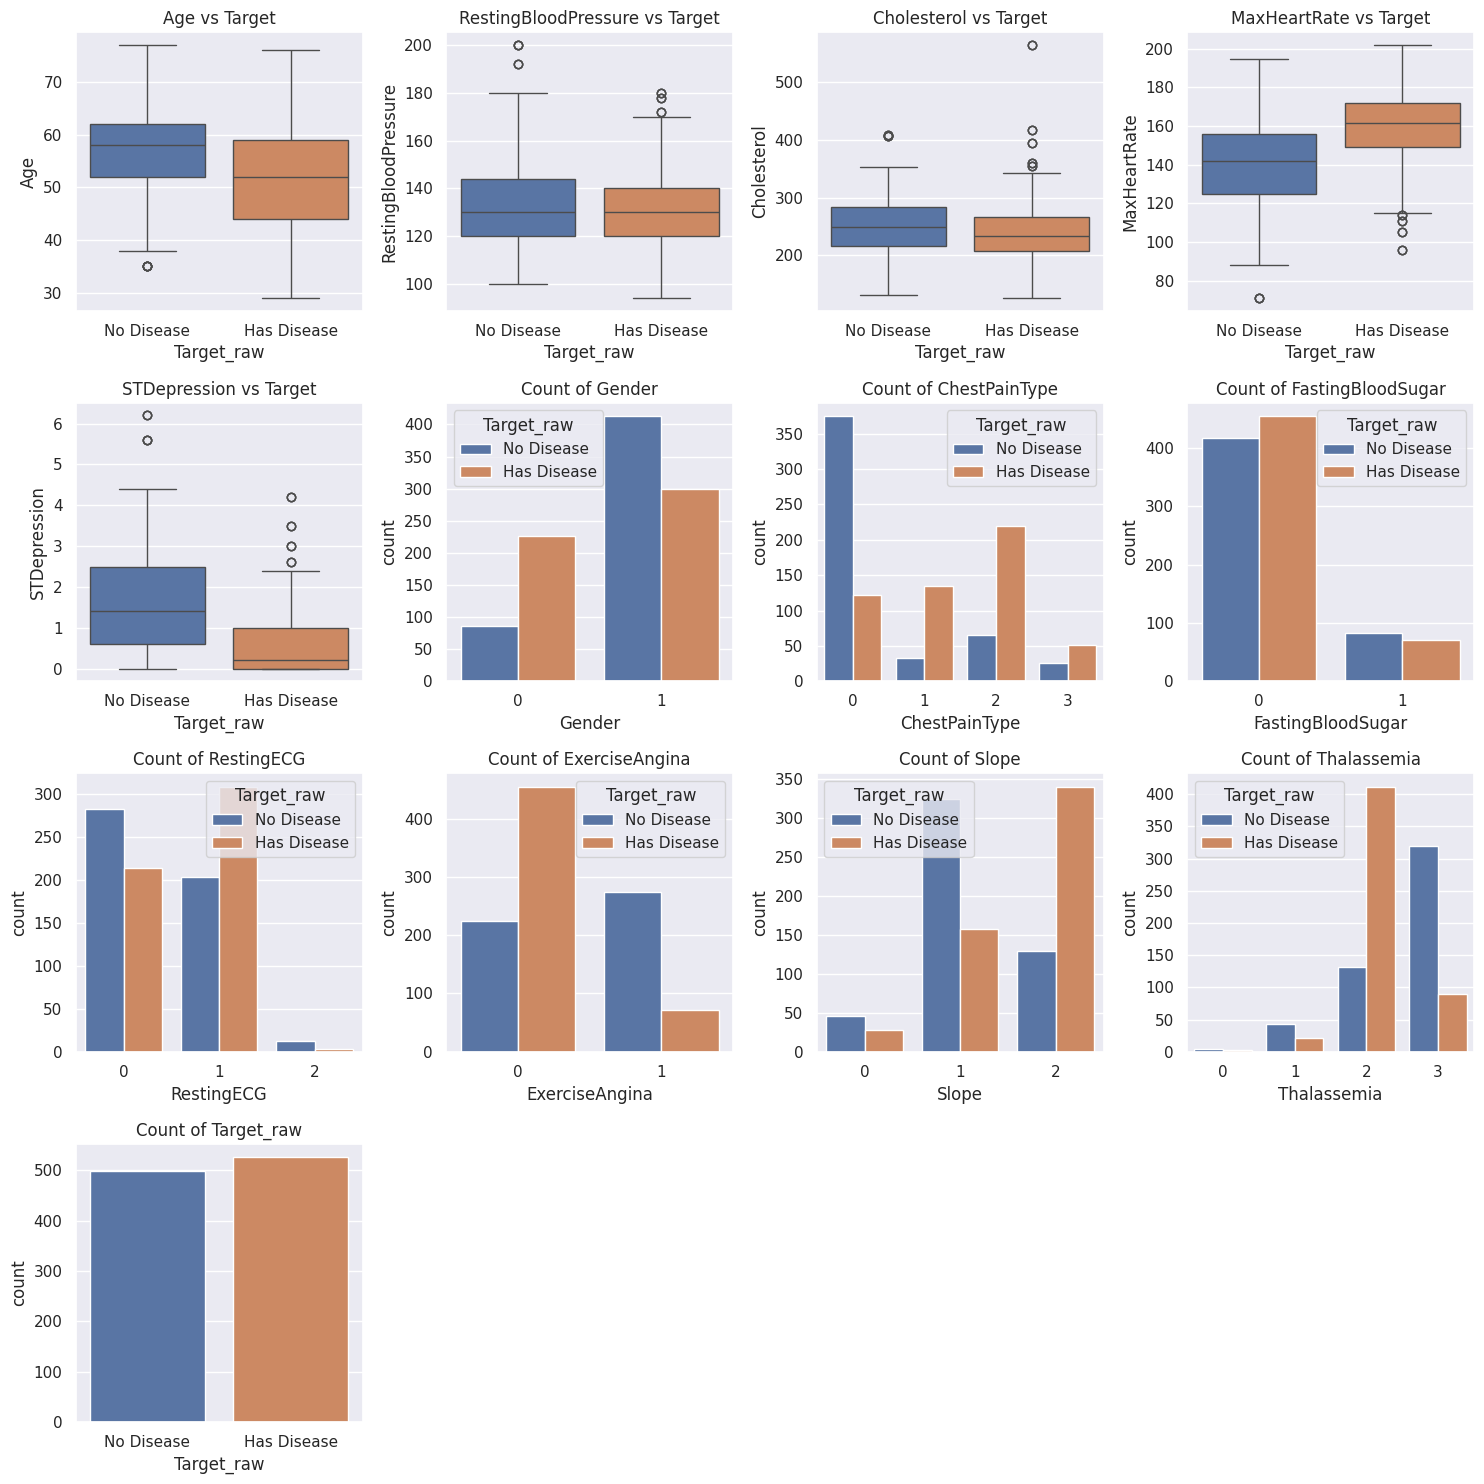

In [10]:
# Plot numerical features

plt.figure(figsize=(15, 15))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data = df, x = 'Target_raw', y = feature, hue = 'Target_raw')
    plt.title(f"{feature} vs Target")

# Plot categorical features
for i, feature in enumerate(cat_features, 1):
    plt.subplot(num_rows, num_cols, i + num_numerical)
    sns.countplot(data=df, x=feature, hue='Target_raw')
    plt.title(f"Count of {feature}")

plt.tight_layout()
plt.show()

## **Multivariate Analysis**


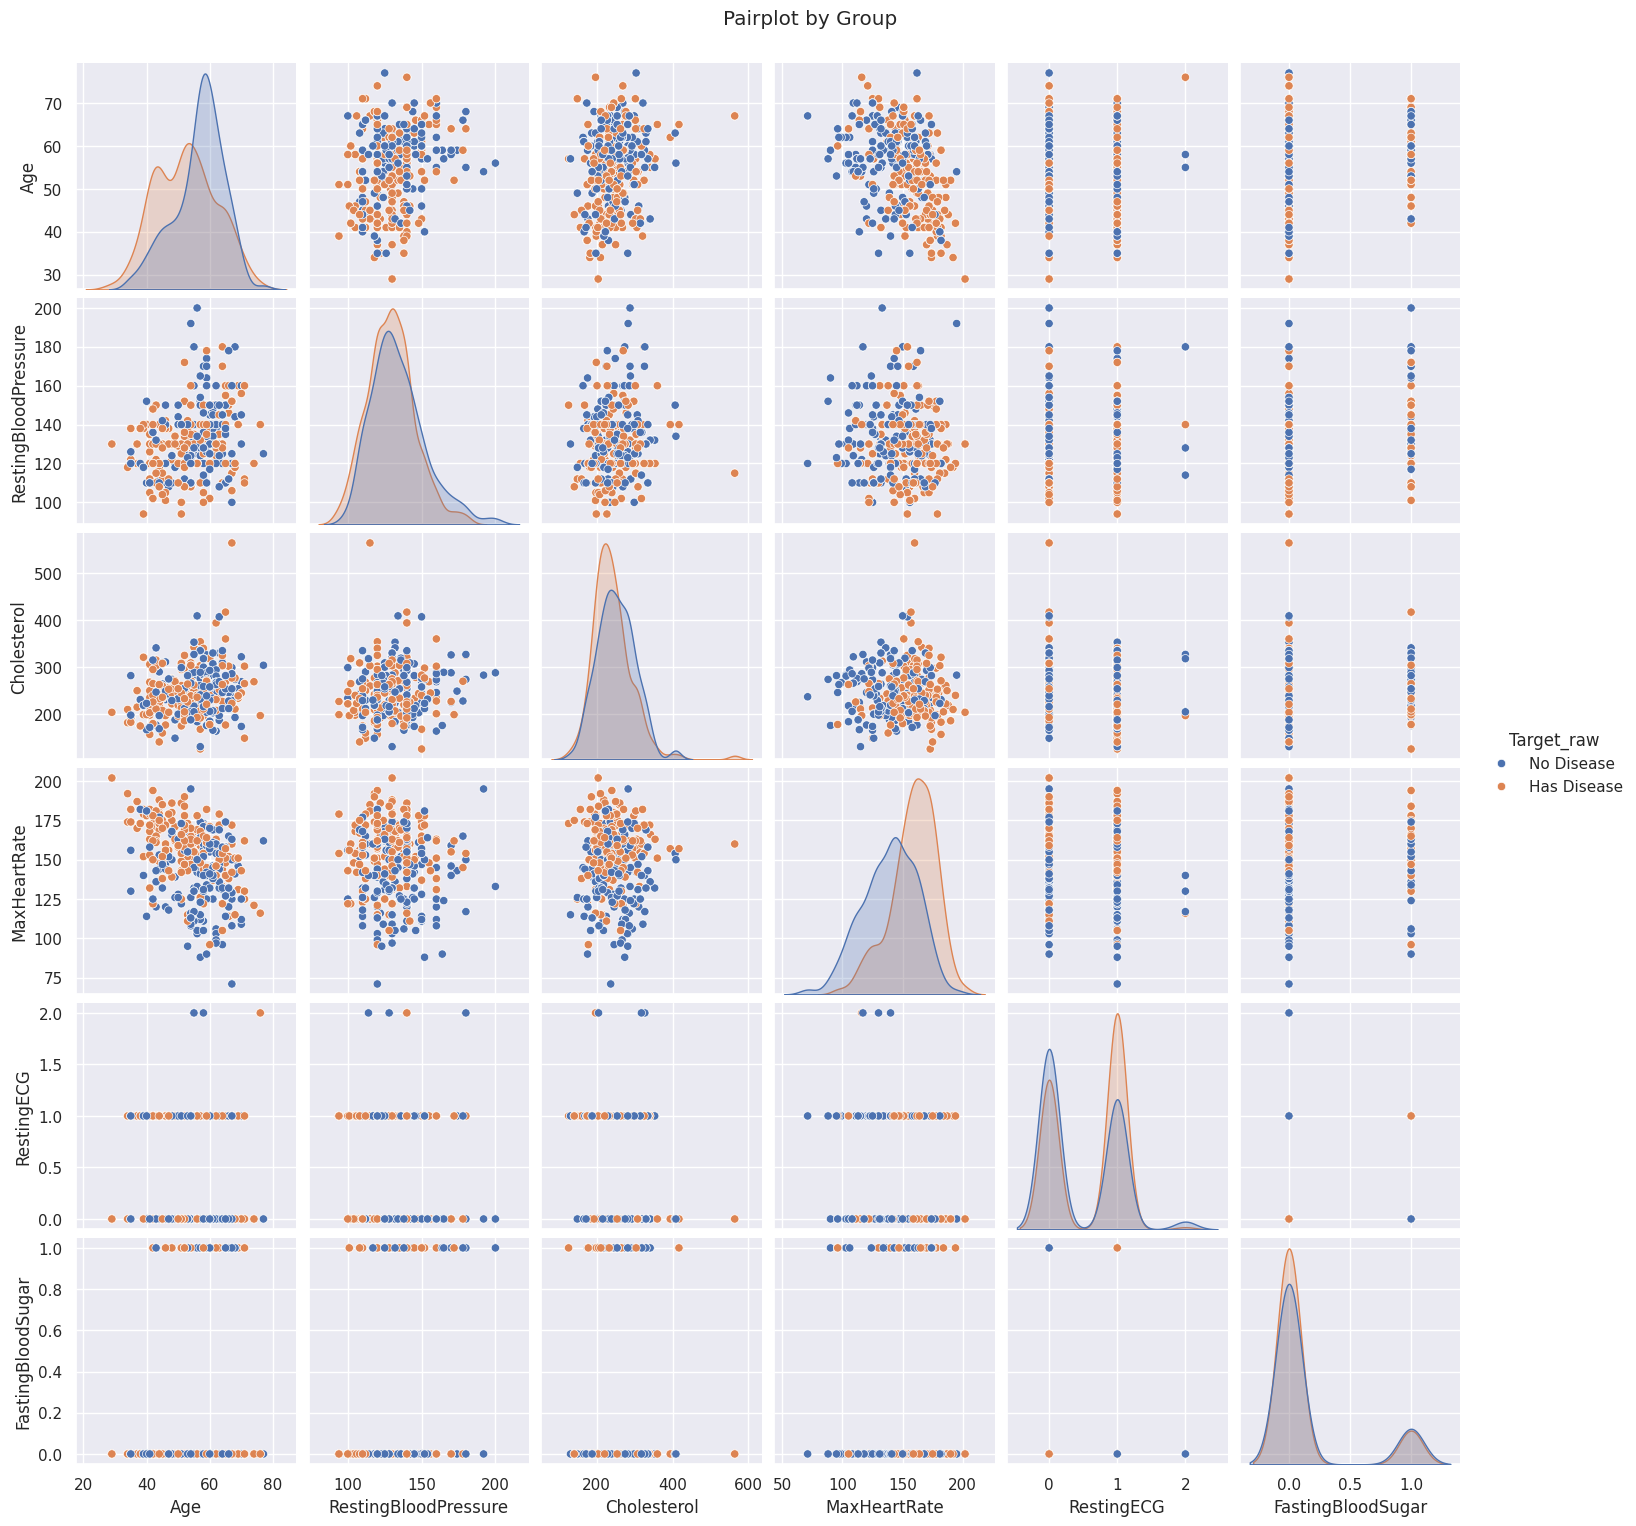

In [11]:
selected_features = ['Age', 'RestingBloodPressure', 'Cholesterol', 'MaxHeartRate', 'RestingECG', 'FastingBloodSugar', 'Target_raw']


sns.pairplot(df[selected_features], hue='Target_raw', diag_kind = 'kde', height = 2.5)
plt.suptitle('Pairplot by Group', y = 1.02)
plt.show()

## **Correlation Matrix**

<ipython-input-12-3a3a2a95c670>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


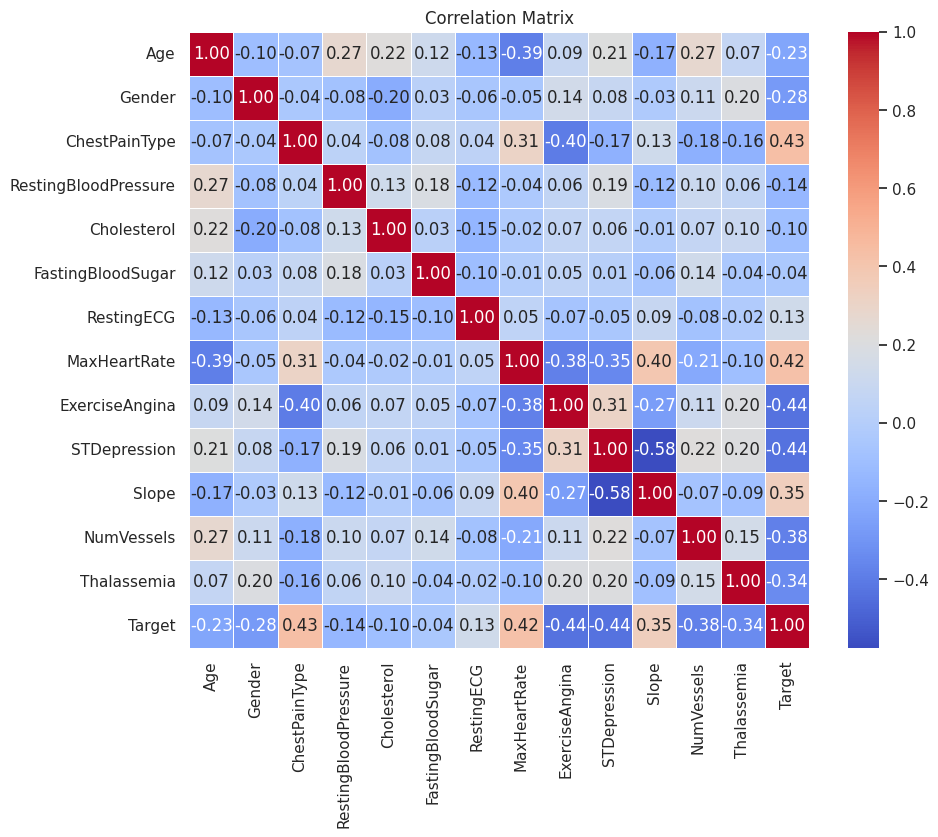

In [12]:
corr_matrix = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

## **Data Cleaning and Feature Engineering**

### **Handling Outliers**

In [13]:
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

    return df


df = remove_outliers(df, numerical_features)
df

,Age,Gender,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseAngina,STDepression,Slope,NumVessels,Thalassemia,Target,Target_raw
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,No Disease
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,No Disease
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,No Disease
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,No Disease
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,No Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,Has Disease
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,No Disease
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,No Disease
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,Has Disease


## **Scaling and Log Transformation**

In [14]:
features_to_log = ['RestingBloodPressure', 'Cholesterol', 'MaxHeartRate']
df[features_to_log] = np.log1p(df[features_to_log])

In [15]:
df

,Age,Gender,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseAngina,STDepression,Slope,NumVessels,Thalassemia,Target,Target_raw
0,52,1,0,4.836282,5.361292,0,1,5.129899,0,1.0,2,2,3,0,No Disease
1,53,1,0,4.948760,5.318120,1,0,5.049856,1,3.1,0,0,3,0,No Disease
2,70,1,0,4.983607,5.164786,0,1,4.836282,1,2.6,0,0,3,0,No Disease
3,61,1,0,5.003946,5.318120,0,1,5.087596,0,0.0,2,1,3,0,No Disease
4,62,0,0,4.934474,5.686975,1,1,4.672829,0,1.9,1,3,2,0,No Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,4.948760,5.402677,0,1,5.105945,1,0.0,2,0,2,1,Has Disease
1021,60,1,0,4.836282,5.556828,0,0,4.955827,1,2.8,1,1,3,0,No Disease
1022,47,1,0,4.709530,5.620401,0,0,4.779123,1,1.0,1,1,2,0,No Disease
1023,50,0,0,4.709530,5.541264,0,0,5.075174,0,0.0,2,0,2,1,Has Disease


## **Splitting the dataset for the Model**

In [16]:
midpoint = len(df) // 2

# Split the DataFrame into two halves along the rows
training_data = df.iloc[:midpoint, :]
testing_data = df.iloc[midpoint:, :]

In [32]:
class DecisionTree:

    def __init__(self, max_depth = None):
        self.max_depth = max_depth

    def calculate_entropy(self, labels):
        class_counts = labels.value_counts()
        probabilities = class_counts / len(labels)
        entropy = -sum(probabilities * np.log2(probabilities))
        return entropy

    def calculate_information_gain(self, data, feature, target):
        entropy_before = self.calculate_entropy(data[target]) # Calculate the initial entropy
        weighted_entropy_after = 0
        unique_values = data[feature].unique() # Finding the unique number of values from the feature
        #print(unique_values)

        for value in unique_values:
            subset = data[data[feature] == value] # Selecting each subset of values
            weight = len(subset) / len(data)
            entropy_after = self.calculate_entropy(subset[target]) # Calculate the entropy of the subset's target values
            weighted_entropy_after += weight * entropy_after # Adding all possible values of features

        information_gain = entropy_before - weighted_entropy_after # Calculation of information gain
        return information_gain


    def find_best_split(self, data, target):
        features = data.columns[:-1] # Selecting all the features except the last one which is the target
        best_feature = None
        best_information_gain = -1 # Initialize information gain to -1 (no IG)

        for feature in features:
            information_gain = self.calculate_information_gain(data, feature, target)

            # Comparing current and previous information gains
            if information_gain > best_information_gain:
                best_feature = feature
                best_information_gain = information_gain

        return best_feature

    def build_tree(self, data, target, depth = 0):
        # Stopping criteria or base case for stopping recursion for building tree
        if depth == self.max_depth or len(data[target].unique()) == 1:
            majority_class = data[target].mode().iloc[0]
            return {"class": majority_class}

        best_feature = self.find_best_split(data, target)

        subsets = {}
        for value in data[best_feature].unique():
            subset = data[data[best_feature] == value]
            subsets[value] = self.build_tree(subset, target, depth + 1)

        return {'feature': best_feature, 'subsets': subsets}

    def fit(self, data, target):
        self.tree = self.build_tree(data, target)

    def predict_instance(self, instance, tree):
        if 'class' in tree:
            return tree['class']
        else:
            feature_value = instance[tree['feature']]
            if feature_value in tree['subsets']:
                return self.predict_instance(instance, tree['subsets'][feature_value])
            else:
                return max(tree['subsets'], key = lambda k: len(tree['subsets'][k]))

    def predict(self, data):
        return data.apply(lambda instance: self.predict_instance(instance, self.tree), axis = 1)


class RandomForest:
    def __init__(self, n_estimators = 10, max_depth = None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = [] # List for storing individual decision trees

    def fit(self, data, target):
        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth = self.max_depth) # Building Decision Tree
            indices = np.random.choice(len(data), len(data), replace = True) # Selecting Random indices from the dataset
            subset_data = data.iloc[indices] # Selecting data which the random indices
            tree.fit(subset_data, target) # Getting predictions from each tree
            self.trees.append(tree) # Storing each tree in a list


    def predict(self, data):
        predictions = pd.DataFrame() # Setting up a DataFrame for storing the values

        for i, tree in enumerate(self.trees):

            prediction_function = lambda instance: tree.predict_instance(instance, tree.tree)

            # Storing Predictions of each Decision Tree in a dataframe, here we are applying predictions
            predictions[f'Tree: {i}'] = data.apply(prediction_function, axis = 1)

        final_predictions = predictions.mode(axis = 1).iloc[:, 0] # Selecting the predictions that occures the most
        return final_predictions

In [33]:
rf_classifier = RandomForest()
rf_classifier.fit(training_data, 'Target')

0.2795548566330912
0.09772053799630775
0.15961043611870918
0.17293201865749397
0.6933403301894806
0.0009457747832313235
0.015916630773005425
0.4970526474846129
0.1268481753098497
0.2867315356176332
0.13747751594611202
0.2085580776328676
0.2632923985371808
0.9968182217763102
0.264915561862601
0.08628816531242445
0.2584277541568617
0.1915631413747324
0.7265700185179159
0.001488226700436246
0.06652407064416188
0.49791942730007654
0.19598202558598465
0.25845566425547184
0.06640083313509726
0.21646076723360652
0.20807695597374865
0.9810263398389799
0.24894723392243534
0.08214492657640493
0.20574927524270137
0.23435101846117323
0.7018529188271061
0.003627597420757356
0.01776490792101204
0.44573630220114024
0.11150044326846054
0.2976600454920407
0.09753120363822587
0.23721880324634015
0.21543344265891395
0.9996894856846348
0.29731820386341745
0.08033677223688018
0.22378692243002485
0.22679433534097115
0.7652881013738253
0.0003216297442298899
0.051357853383235286
0.5427583594541957
0.167165330

In [34]:
predictions = rf_classifier.predict(testing_data)

In [26]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(predictions, testing_data['Target']))

Accuracy: 1.0


In [21]:
dt_classifier = DecisionTree()
dt_classifier.fit(training_data, 'Target')

In [22]:
dt_predictions = dt_classifier.predict(testing_data)

print("Accuracy:", accuracy_score(dt_predictions, testing_data['Target']))

Accuracy: 1.0


In [27]:
testing_data['Target'].unique()

array([1, 0])

In [31]:
df[df['Age'] == 34]

,Age,Gender,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaxHeartRate,ExerciseAngina,STDepression,Slope,NumVessels,Thalassemia,Target,Target_raw
12,34,0,1,4.779123,5.351858,0,1,5.262690,0,0.7,2,0,2,1,Has Disease
15,34,0,1,4.779123,5.351858,0,1,5.262690,0,0.7,2,0,2,1,Has Disease
143,34,1,3,4.779123,5.209486,0,0,5.164786,0,0.0,2,0,2,1,Has Disease
201,34,1,3,4.779123,5.209486,0,0,5.164786,0,0.0,2,0,2,1,Has Disease
572,34,1,3,4.779123,5.209486,0,0,5.164786,0,0.0,2,0,2,1,Has Disease
779,34,0,1,4.779123,5.351858,0,1,5.262690,0,0.7,2,0,2,1,Has Disease
